In [538]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = UserWarning)

plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

In [539]:
# Loading and preparing the data
df = pd.read_excel("burtgegdsen_gemt_hereg.xlsx")
df = df.T.reset_index(drop=True)
df.columns = ['Он сар', 'Улсын дүн', 'Хөнгөн', 'Хүндэвтэр', 'Хүнд', 'Онц хүнд']
df.drop([0, 1], inplace=True)
df.index = df['Он сар']
df.drop(columns = ['Он сар'], axis=1, inplace=True)
#df.to_csv('гэмт_хэргийн бүртгэл.csv')
df

,Улсын дүн,Хөнгөн,Хүндэвтэр,Хүнд,Онц хүнд
Он сар,,,,,
2014-01,2651,1143,1313,161,34
2014-02,4452,1992,2118,284,58
2014-03,6672,3038,3040,480,114
2014-04,9119,4253,4044,656,166
2014-05,11445,5289,5118,816,222
...,...,...,...,...,...
2020-11,22506,18703,NaN,3803,NaN
2020-12,23064,19247,NaN,3817,NaN
2021-01,1789,1504,NaN,285,NaN


In [540]:
# Converting data types to numeric for computational purposes
df['Улсын дүн'] = pd.to_numeric(df['Улсын дүн'])
df['Хөнгөн'] = pd.to_numeric(df['Хөнгөн'])
df['Хүндэвтэр'] = pd.to_numeric(df['Хүндэвтэр'])
df['Хүнд'] = pd.to_numeric(df['Хүнд'])
df['Онц хүнд'] = pd.to_numeric(df['Онц хүнд'])

In [541]:
df.describe()

,Улсын дүн,Хөнгөн,Хүндэвтэр,Хүнд,Онц хүнд
count,87.000000,87.000000,49.000000,87.000000,49.000000
mean,16190.275862,10376.402299,6011.530612,2287.793103,249.061224
std,8884.683286,6677.041704,3294.533623,2100.184860,143.623554
min,1789.000000,1143.000000,0.000000,124.000000,0.000000
25%,8431.500000,5149.500000,3505.000000,679.500000,138.000000
50%,15825.000000,9324.000000,5463.000000,1393.000000,257.000000
75%,23054.000000,13826.000000,8540.000000,3615.000000,357.000000
max,36220.000000,28095.000000,12127.000000,8125.000000,529.000000


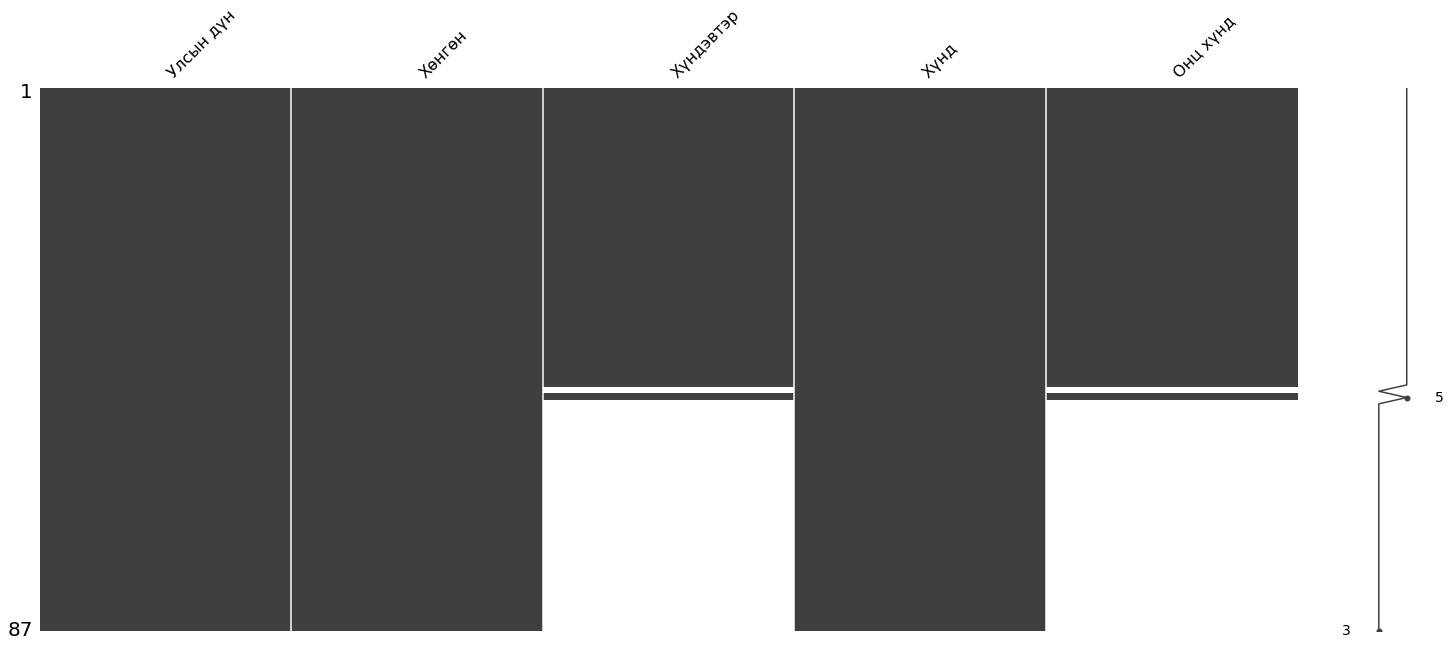

In [542]:
import missingno as msno

# Багануудын дутуу утгуудын харъя
fig = msno.matrix(df)
fig_copy = fig.get_figure()
fig_copy.savefig('дутуу_утгууд.png', bbox_inches="tight")

In [543]:
# Хүндэвтэр болон онц хүнд баганууд 2018 оноос хойш утгагүй тул хасъя
df.drop(columns = ['Хүндэвтэр', 'Онц хүнд'], inplace = True)
df

,Улсын дүн,Хөнгөн,Хүнд
Он сар,,,
2014-01,2651,1143,161
2014-02,4452,1992,284
2014-03,6672,3038,480
2014-04,9119,4253,656
2014-05,11445,5289,816
...,...,...,...
2020-11,22506,18703,3803
2020-12,23064,19247,3817
2021-01,1789,1504,285


## Assignment functions

In [544]:
def function_detailed_return(function, data):
    #[first_task(df[col]) for col in df.columns]

    for col in data.columns:
        print(col)
        print(function(data[col]))
        print('*'*32)

In [545]:
import statistics

def first_task(data):
    # Returns Дундаж, медиан, моод
    return {'Түүврийн дундаж': data.mean(),
            'Түүврийн медиан': statistics.median(data),
            'Түүврийн моод': statistics.mode(data)}

In [546]:
function_detailed_return(first_task, df)

Улсын дүн
{'Түүврийн дундаж': 16190.275862068966, 'Түүврийн медиан': 15825, 'Түүврийн моод': 2651}
********************************
Хөнгөн
{'Түүврийн дундаж': 10376.402298850575, 'Түүврийн медиан': 9324, 'Түүврийн моод': 7326}
********************************
Хүнд
{'Түүврийн дундаж': 2287.793103448276, 'Түүврийн медиан': 1393, 'Түүврийн моод': 161}
********************************


In [576]:
def second_task(data):
    # Returns Далайц, дундаж квадрат хазайлт, стандарт хазайлт
    return {'Түүврийн далайц': data.max()-data.min(),
            'Түүврийн дундаж квадрат хазайлт': np.var(data), #np.var(data)
            'Түүврийн стандарт хазайлт': np.std(data)} #np.std(data)

In [577]:
function_detailed_return(second_task, df)

Улсын дүн
{'Түүврийн далайц': 34431, 'Түүврийн дундаж квадрат хазайлт': 78030268.38367024, 'Түүврийн стандарт хазайлт': 8833.474309900394}
********************************
Хөнгөн
{'Түүврийн далайц': 26952, 'Түүврийн дундаж квадрат хазайлт': 44070438.95309816, 'Түүврийн стандарт хазайлт': 6638.556993285375}
********************************
Хүнд
{'Түүврийн далайц': 8001, 'Түүврийн дундаж квадрат хазайлт': 4360077.865239794, 'Түүврийн стандарт хазайлт': 2088.079947042209}
********************************


In [549]:
from scipy.stats import kurtosis, skew

def dist_shape(data):
    return {'Kurtosis': kurtosis(data),
            'Skew': skew(data)}

In [550]:
def third_task(data, file_name=None):
    # Returns хайрцган диаграм
    fig, ax = plt.subplots(figsize=(16, 8))
    sns.boxplot(ax=ax, x = data)
    
    plt.savefig(file_name+'.png')

In [551]:
def fourth_task(data, file_name=None):
    # Returns хуримтлагдсан давтамжын хүснэгт
    k = 7 # [log(2, n) + 1]
    m, M = data.min(), data.max()
    d = M - m
    
    # pandas сангын 'cut' функцыг ашиглаж өгөгдлийг 7 тэнцүү хэсэгт хуваав.
    intervals = pd.cut(data, bins=7)
    data_frame = data.copy()
    data_frame['intervals'] = intervals

    # Интервалуудын завсрын цэгүүдийг тооцоолох
    polygon_x = [x.mid for x in data_frame['intervals'].value_counts().index]
    # Интервалуудын давтамжыг оноох
    polygon_y = [y for y in data_frame['intervals'].value_counts().values]

    # Давтамжын хүснэгтийг байгуулах
    frequency_table = pd.concat([data_frame['intervals'].value_counts().reset_index(), pd.Series(polygon_x)], 
                                 axis = 1)
    
    frequency_table.columns = ['Интервал', 'Давтамж', 'Интервалын дундаж цэг']
    frequency_table.sort_values(by = ['Интервал'], inplace = True, ignore_index = True)

    n = data_frame.shape[0] # 80
    frequency_table['h = n/dn'] = frequency_table['Давтамж']/(d*n)
    
    frequency_table.to_csv(file_name+'.csv')

    return frequency_table, polygon_x, polygon_y

In [552]:
def fifth_task(data, title, file_name=None):
    # Returns гистограм болон полигон
    plt.figure(figsize=(16,8))
    plt.hist(data, bins = 7, ec = 'black')
    sns.lineplot(x = polygon_x, y = polygon_y)

    plt.title(title, fontsize = 18)
    plt.xlabel('Бүртгэгдсэн гэмт хэрэг', fontsize = 16)
    plt.ylabel('Давтамж', fontsize = 16)

    plt.savefig(file_name+'.png')

## Улсын хэмжээнд бүртгэгдсэн нийт гэмт хэргийн тоо

In [553]:
# Kurtosis and skew
dist_shape(df['Улсын дүн'])

{'Kurtosis': -0.9592132178177772, 'Skew': 0.18195787212195047}

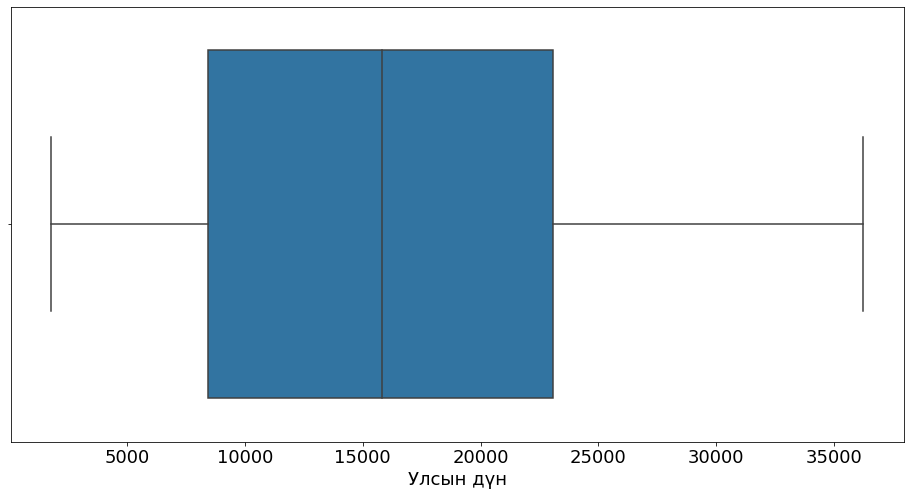

In [554]:
third_task(df['Улсын дүн'], file_name = 'хайрцган_диаграм_улсын_дүн')

In [555]:
frequency_table, polygon_x, polygon_y = fourth_task(df['Улсын дүн'], file_name = 'хуримтлагдсан_давтамжын_хүснэгт_улсын_дүн')
frequency_table

,Интервал,Давтамж,Интервалын дундаж цэг,h = n/dn
0,"(1754.569, 6707.714]",15,4231.1415,0.000005
1,"(6707.714, 11626.429]",16,9167.0715,0.000005
2,"(11626.429, 16545.143]",14,14085.7860,0.000005
3,"(16545.143, 21463.857]",16,19004.5000,0.000005
4,"(21463.857, 26382.571]",13,23923.2140,0.000004
5,"(26382.571, 31301.286]",8,28841.9285,0.000003
6,"(31301.286, 36220.0]",5,33760.6430,0.000002


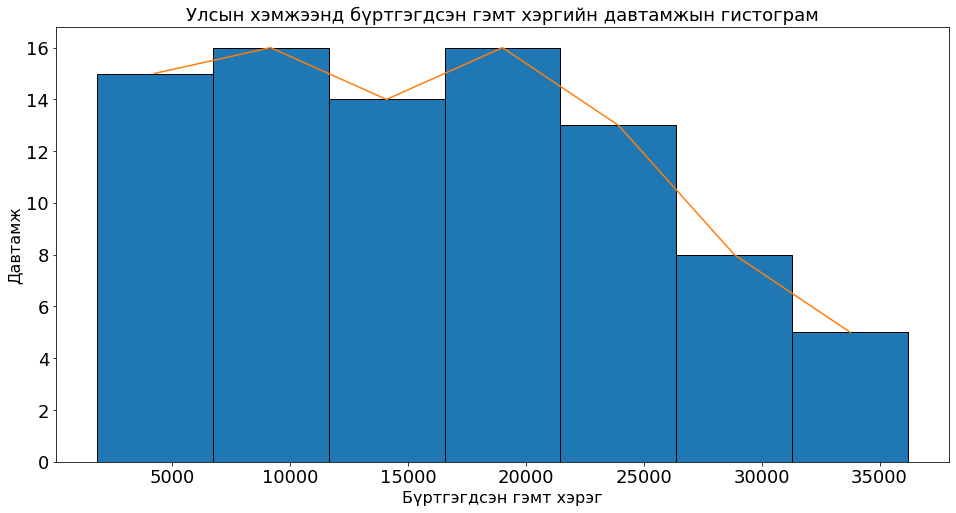

In [556]:
fifth_task(df['Улсын дүн'], 'Улсын хэмжээнд бүртгэгдсэн гэмт хэргийн давтамжын гистограм', file_name = 'гистограм_улсын_дүн')

## Хөнгөн гэмт хэргийн бүртгэл

In [557]:
# Kurtosis and skew
dist_shape(df['Хөнгөн'])

{'Kurtosis': -0.27065511793875885, 'Skew': 0.6911335519700412}

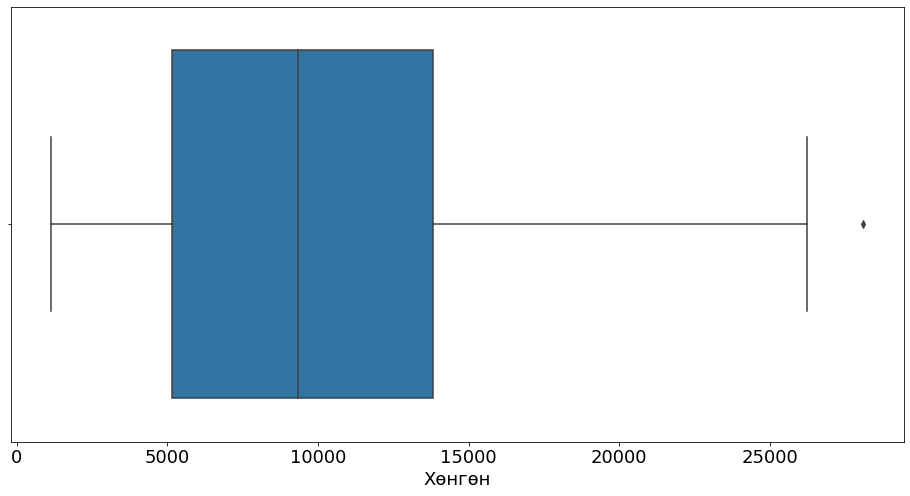

In [558]:
third_task(df['Хөнгөн'], file_name = 'хайрцган_диаграм_хөнгөн')

In [559]:
frequency_table, polygon_x, polygon_y = fourth_task(df['Хөнгөн'], file_name = 'хуримтлагдсан_давтамжын_хүснэгт_хөнгөн')
frequency_table

,Интервал,Давтамж,Интервалын дундаж цэг,h = n/dn
0,"(1116.048, 4993.286]",21,3054.6670,0.000009
1,"(4993.286, 8843.571]",21,6918.4285,0.000009
2,"(8843.571, 12693.857]",17,10768.7140,0.000007
3,"(12693.857, 16544.143]",12,14619.0000,0.000005
4,"(16544.143, 20394.429]",8,18469.2860,0.000003
5,"(20394.429, 24244.714]",4,22319.5715,0.000002
6,"(24244.714, 28095.0]",4,26169.8570,0.000002


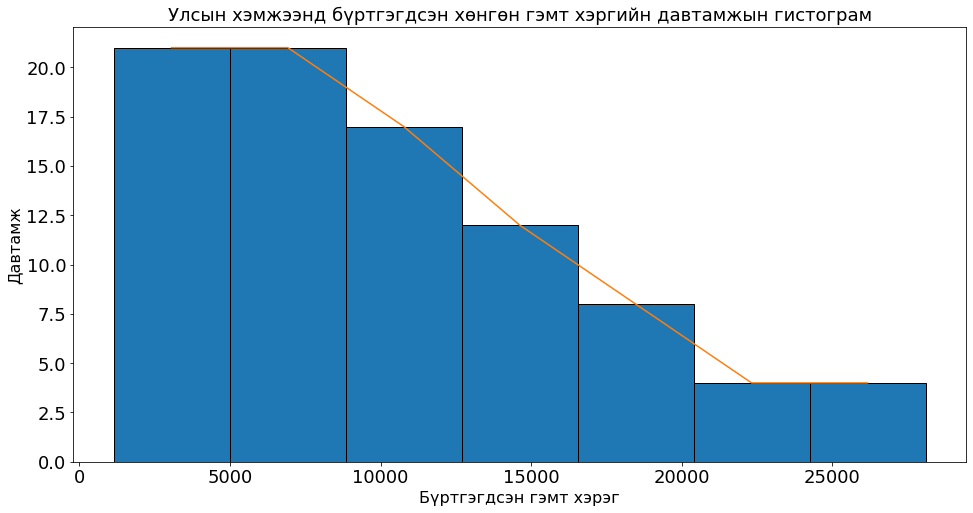

In [560]:
fifth_task(df['Хөнгөн'], 'Улсын хэмжээнд бүртгэгдсэн хөнгөн гэмт хэргийн давтамжын гистограм', file_name = 'гистограм_хөнгөн')

## Хүнд гэмт хэргийн бүртгэл

In [561]:
# Kurtosis and skew
dist_shape(df['Хүнд'])

{'Kurtosis': 0.04669031219200015, 'Skew': 1.0779741488217085}

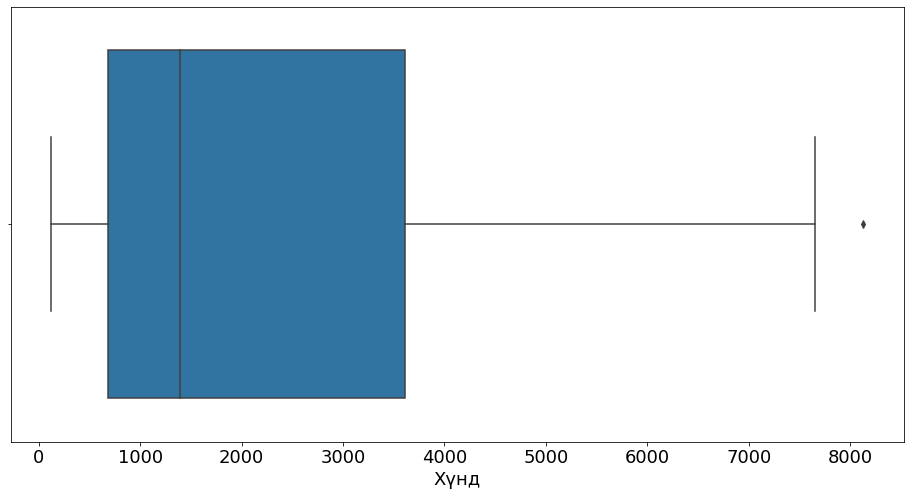

In [562]:
third_task(df['Хүнд'], file_name = 'хайрцган_диаграм_хүнд')

In [563]:
frequency_table, polygon_x, polygon_y = fourth_task(df['Хүнд'], file_name = 'хуримтлагдсан_давтамжын_хүснэгт_хүнд')
frequency_table

,Интервал,Давтамж,Интервалын дундаж цэг,h = n/dn
0,"(115.999, 1267.0]",40,691.4995,0.000057
1,"(1267.0, 2410.0]",16,1838.5000,0.000023
2,"(2410.0, 3553.0]",8,2981.5000,0.000011
3,"(3553.0, 4696.0]",9,4124.5000,0.000013
4,"(4696.0, 5839.0]",5,5267.5000,0.000007
5,"(5839.0, 6982.0]",6,6410.5000,0.000009
6,"(6982.0, 8125.0]",3,7553.5000,0.000004


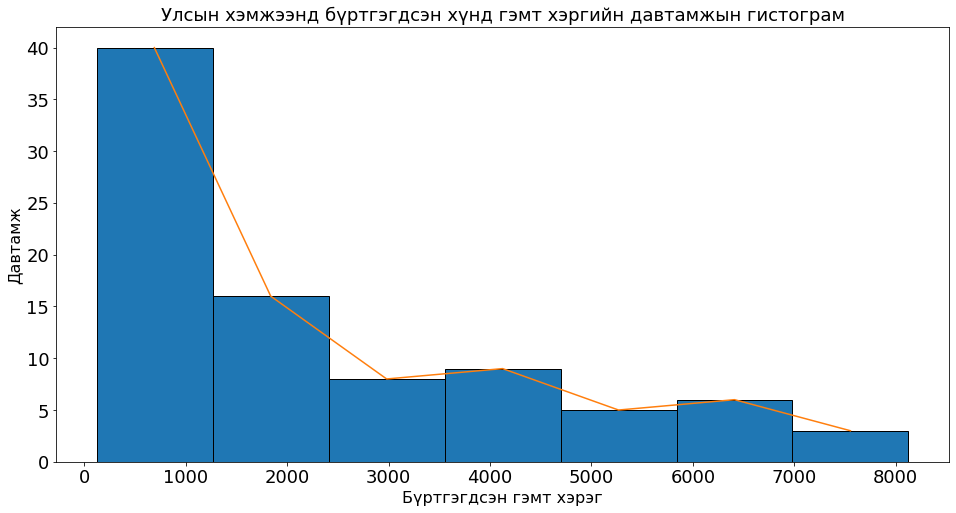

In [564]:
fifth_task(df['Хүнд'], 'Улсын хэмжээнд бүртгэгдсэн хүнд гэмт хэргийн давтамжын гистограм', file_name = 'гистограм_хүнд')

In [565]:
def line_graph(data):
    # Өгөгдлийн шугаман графикийг байгуулна
    fig, ax = plt.subplots(figsize = (16, 8))
    
    ax.set_title('Улсын хэмжээнд бүртгэгдсэн гэмт хэргийн тоо (ангилалаар)', fontsize = 18)
    ax.set_xlabel('Он', fontsize = 16)
    ax.set_ylabel('Гэмт хэргийн тоо', fontsize = 16)
    
    for col in data.columns[:3]:
        ax.plot(data[col])
        
    labels = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
    ax.set_xticks(np.arange(0, 96, step=12))    
    ax.set_xticklabels(labels, rotation = 90)
        
    ax.legend(labels = ['Улсын хэмжээнд', 'Хөнгөн', 'Хүнд'])
    fig.savefig('гэмт_хэрэг_шугаман_график.png')

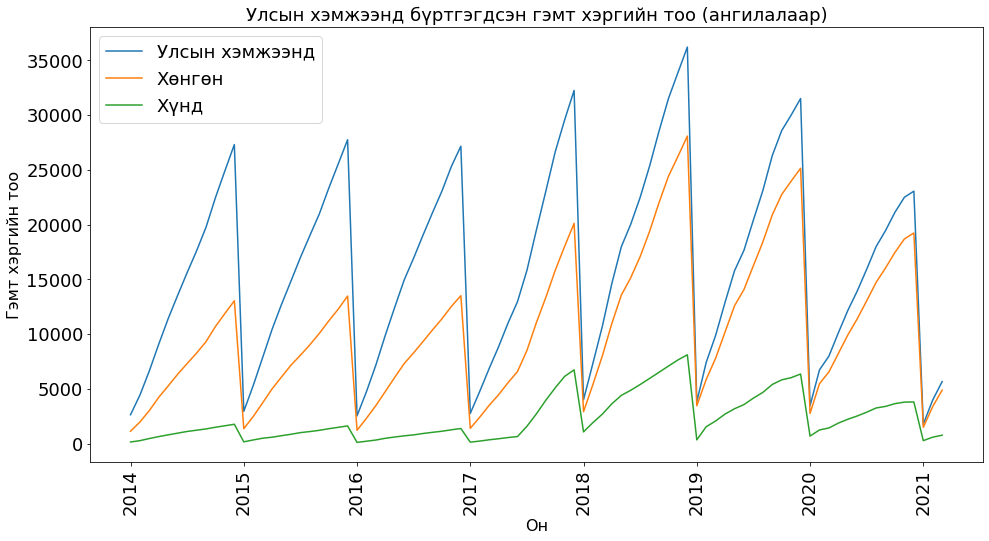

In [566]:
line_graph(df)